In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
sns.set(style = 'whitegrid')
sns.set_context(rc = {'lines.linewidth': 2.5})
mpl.rcParams['figure.figsize'] = [16,9]

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Explorative Data Analysis

In [3]:
df_plot = pd.read_csv('../data/processed/COVID_small_flat.csv', sep = ';')
df_plot.head()

,date,US,Canada,Brazil,China,Japan,"Korea, South",UK,Italy,France,New Zealand
0,2020-01-22,1,0,0,548,2,1,0,0,0,0
1,2020-01-23,1,0,0,643,2,1,0,0,0,0
2,2020-01-24,2,0,0,920,2,2,0,0,2,0
3,2020-01-25,2,0,0,1406,2,2,0,0,3,0
4,2020-01-26,5,1,0,2075,4,3,0,0,3,0


### Matplotlib

<Figure size 1152x648 with 0 Axes>

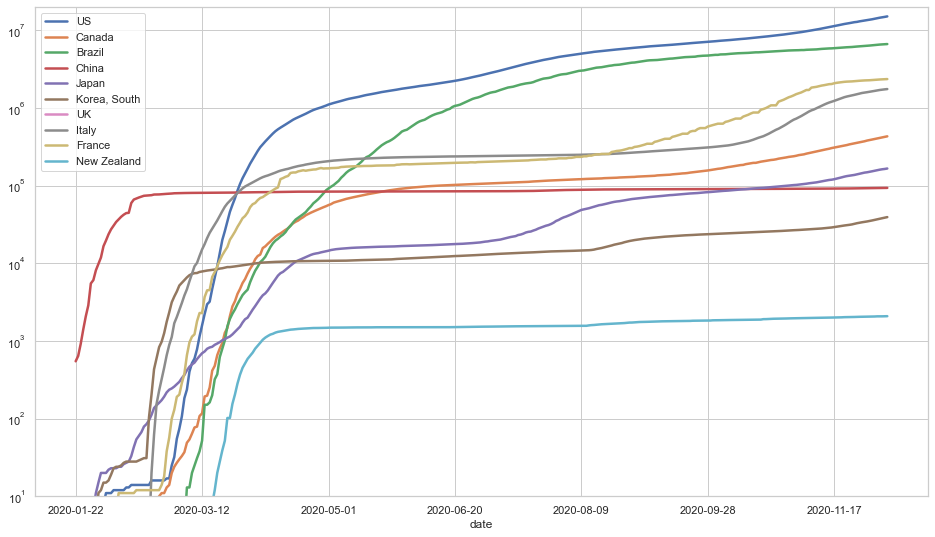

In [4]:
plt.figure();
ax = df_plot.set_index('date').plot()
plt.ylim(10,20000000)
ax.set_yscale('log')

### Plot.ly

In [5]:
import plotly.graph_objects as go

In [6]:
fig = go.Figure()

In [7]:
country_list = ['US',
                'Canada',
                'Brazil',
                'China',
                'Japan',
                'Korea, South',
                'UK',
                'Italy',
                'France',
                'New Zealand'
                ]

In [8]:
for country in country_list:
    fig.add_trace(go.Scatter(x = df_plot.date, y = df_plot[country], name = country))

fig.update_layout(
    width = 1600,
    height = 900,
    xaxis_title = 'Time',
    yaxis_title = 'Confirmed Cases (John Hopkins Data, log-scale)'
)

fig.update_yaxes(type = 'log', range = [1.1, 8])

fig.update_layout(xaxis_rangeslider_visible = True)
fig.show(renderer='browser')

### Dash

In [9]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [10]:
app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Select Country'),
    
    dcc.Dropdown(
        id = 'country_drop_down',
        options = [
            {'label': 'US', 'value': 'US'},
            {'label': 'Canada', 'value': 'Canada'},
            {'label': 'Brazil', 'value': 'Brazil'},
            {'label': 'China', 'value': 'China'},
            {'label': 'Japan', 'value': 'Japan'},
            {'label': 'Korea, South', 'value': 'Korea, South'},
            {'label': 'UK', 'value': 'UK'},
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'France', 'value': 'France'},
            {'label': 'New Zealand', 'value': 'New Zealand'}
        ],
        value = ['US', 'China'], # which are pre-selected
        multi = True
    ),   
    dcc.Graph(figure = fig, id = 'main_window_slope')
])

In [11]:
@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])

def update_fig(country_list):
    
    traces = []
    
    for country in country_list:
        traces.append(dict(x = df_plot.date, y = df_plot[country], name = country
                          )
                     )
    return{
        'data': traces,
        'layout': dict(
            width = 1600,
            height = 900,
            xaxis_title = 'Time',
            yaxis_title = 'Confirmed Cases (John Hopkins Data, log-scale)',
            xaxis = {'tickangle':-45,
                     'nticks':20,
                     'tickfont':dict(size=14,color="#7f7f7f")
                  },
            yaxis = {'type':"log",
                     'range':'[1.1,8]'
                    }
        )
    }

In [ ]:
app.run_server(debug = True, use_reloader = False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
